In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Meher Bamrah\Desktop\Dataset.csv")


In [3]:
print("The following is the Toyota Corolla Dataset : \n")
print(df.head())
print("/n")
print(df.info())

The following is the Toyota Corolla Dataset : 

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Ra

In [4]:
# Creating a copy of the original dataset for modifications
cars_data_ins = df.copy()

In [5]:
# To display basic statistics of numerical attributes
print("Basic Statistics of Numerical Attributes: \n")
print(cars_data_ins.describe())

Basic Statistics of Numerical Attributes: 

                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080    

In [8]:
# Frequency Table for one categorical variable: FuelType
Fuel_freq = pd.crosstab(index=cars_data_ins['Fuel_Type'], columns='Count', dropna=True)
print("\nFrequency Table for Fuel Type : \n")
print(Fuel_freq)


Frequency Table for Fuel Type : 

col_0      Count
Fuel_Type       
CNG           17
Diesel       155
Petrol      1264


In [10]:
# Correlation matrix for numerical variables
num_data = cars_data_ins.select_dtypes(exclude=[object])
corr_mat = num_data.corr()
print("\nCorrelation Matrix:")
print(corr_mat)


Correlation Matrix:
                        Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.00

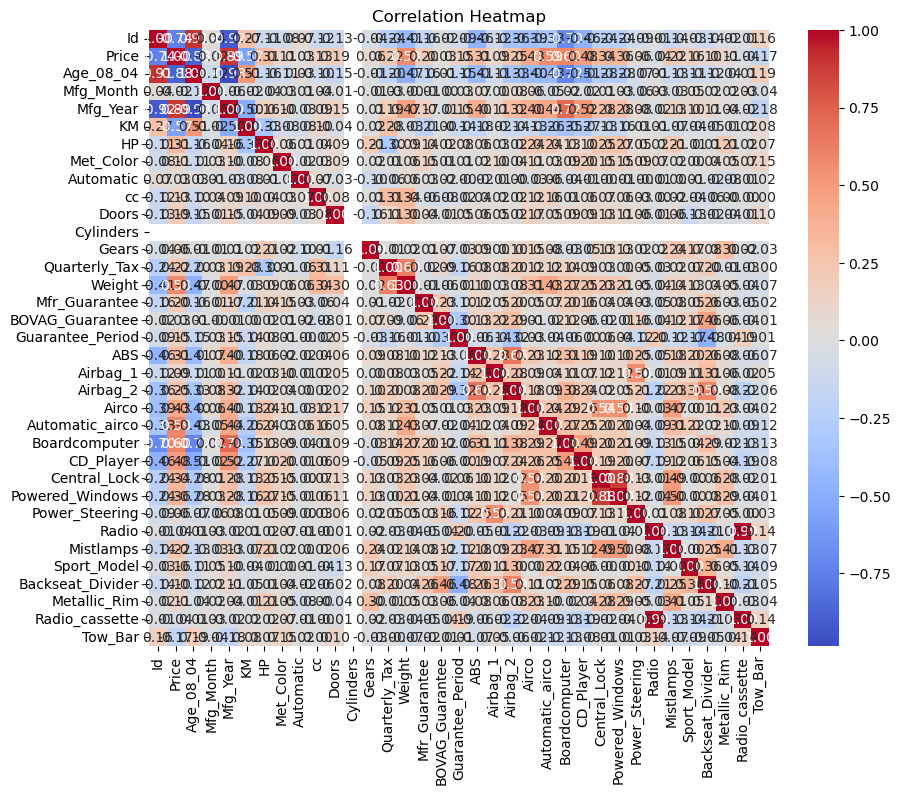

In [11]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

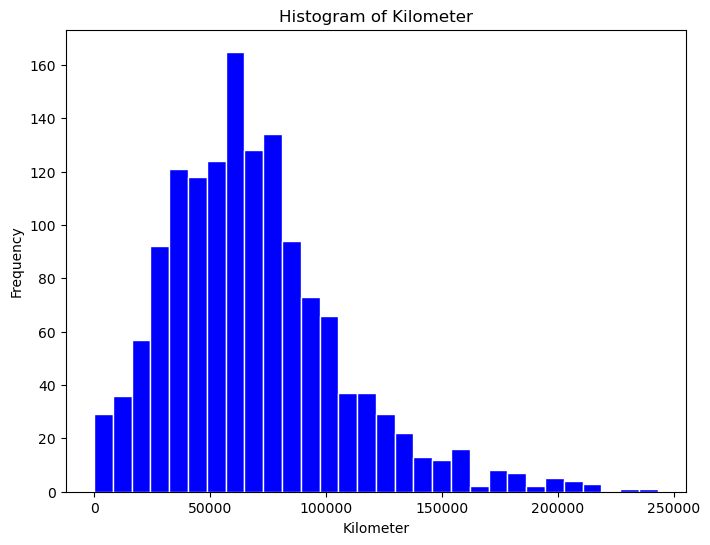

In [12]:
# Histogram of Kilometer (KM)
plt.figure(figsize=(8, 6))
plt.hist(cars_data_ins['KM'], color='blue', edgecolor='white', bins=30)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

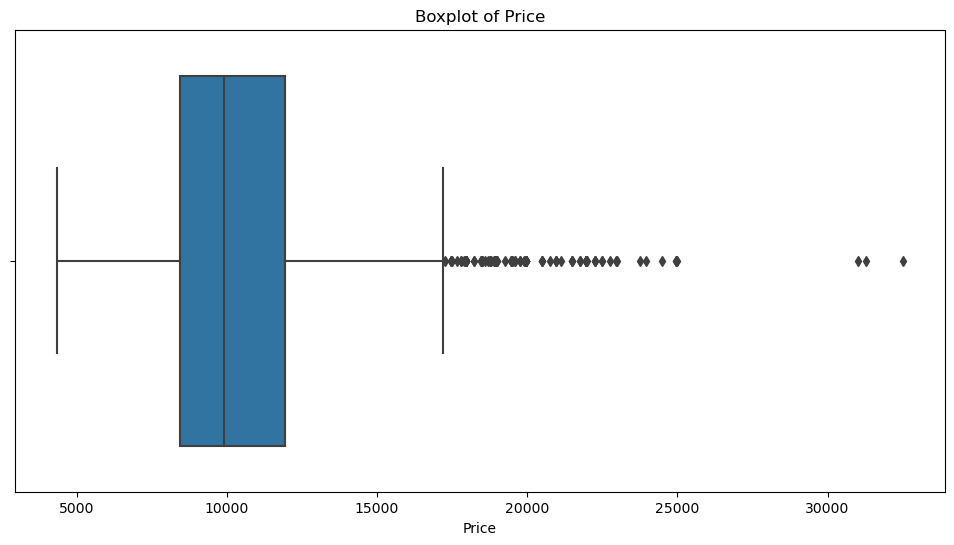

In [15]:
# Boxplot and distribution of Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=cars_data_ins['Price'])
plt.title('Boxplot of Price')
plt.show()

In [ ]:
print("\nMissing values before handling:")
print(df.isnull().sum())